In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import copy

In [2]:
data_shuffle_path = '../data/linear_data/linear_shuffle_data.npy'
data_scatter_path = '../data/linear_data/linear_scatter_data.npy'
data_true_path    = '../data/linear_data/linear_true_data.npy'

data_shuffle = np.load(data_shuffle_path)
data_scatter = np.load(data_scatter_path)
data_true = np.load(data_true_path)

In [3]:
epochs = 100
lr = 0.001
batch_size = 100

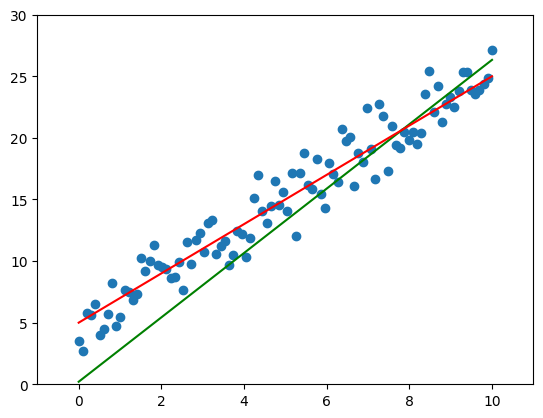

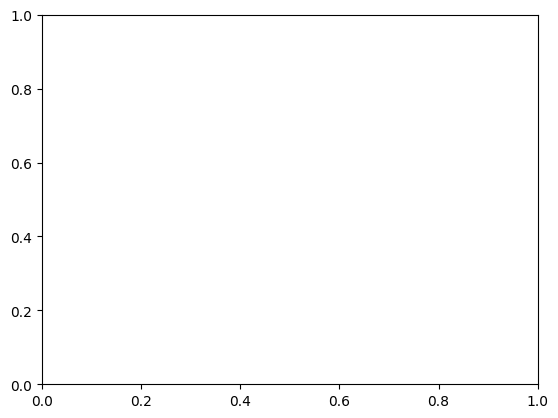

In [5]:
# 模仿一个感知机
w = np.random.randn(1)
b = np.random.randn(1)
x_data = data_shuffle[:,0]
y_data = data_shuffle[:,1]
fig = plt.figure()
ax = fig.add_subplot()
ax.set_xlim(-1, 11)
ax.set_ylim(0, 25)
display(fig, display_id='plot')
for epoch in range(epochs):
    batch_count = 0
    grad_w_sum  = 0
    grad_b_sum  = 0
    for i in range(x_data.shape[0]):
        y = w * x_data[i] + b
        grad_w = (y_data[i] - y) * (-1) * x_data[i]
        grad_b = (y_data[i] - y) * (-1)
        batch_count = batch_count + 1
        if batch_count >= batch_size:
            grad_w_sum = grad_w_sum + grad_w
            grad_b_sum = grad_b_sum + grad_b
            w = w - lr * (grad_w_sum) / batch_size
            b = b - lr * (grad_b_sum) / batch_size
            grad_w_sum = 0
            grad_b_sum = 0
            batch_count = 0
        else:
            grad_w_sum = grad_w_sum + grad_w
            grad_b_sum = grad_b_sum + grad_b
        
    ax.set_xlim(-1, 11)
    ax.set_ylim(0, 30)
    ax.scatter(data_scatter[:,0], data_scatter[:,1])
    y_show = w * data_true[:,0] + b
    ax.plot(data_true[:,0], y_show, color='green')
    ax.plot(data_true[:,0], data_true[:,1], color='red')
    display(fig, display_id='plot',update=True)
    ax.clear()
    

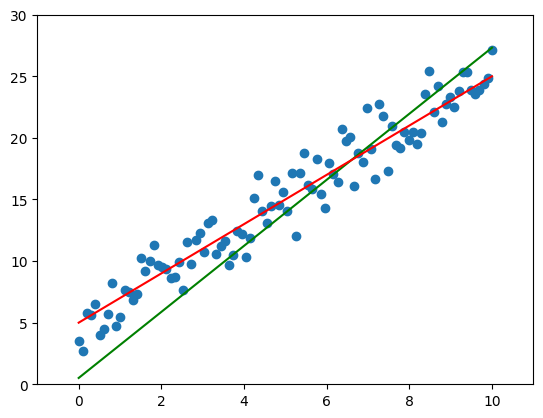

/tmp/ipykernel_556152/3527192026.py:73: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_show[i] = y[0]


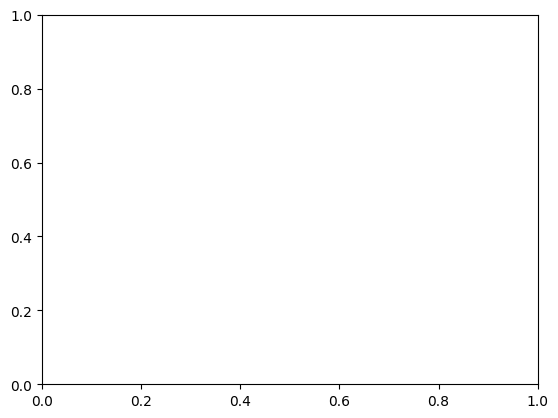

In [6]:
# 模仿一个两层的神经网络
W1 = np.random.randn(1,3)
B1 = np.random.randn(1,3)
W2 = np.random.randn(3,3)
B2 = np.random.randn(1,3)
W3 = np.random.randn(3,1)
B3 = np.random.randn(1,1)
x_data = data_shuffle[:,0]
y_data = data_shuffle[:,1]
fig = plt.figure()
ax = fig.add_subplot()
ax.set_xlim(-1, 11)
ax.set_ylim(0, 25)
display(fig, display_id='plot')
for epoch in range(epochs):
    batch_count = 0
    grad_b3_sum = 0
    grad_w3_sum = 0
    grad_b2_sum = 0
    grad_w2_sum = 0
    grad_b1_sum = 0
    grad_w1_sum = 0
    for i in range(x_data.shape[0]):
        x1 = x_data[i] * W1 + B1
        x2 = np.matmul(x1, W2) + B2
        y = np.matmul(x2, W3) + B3
        delta_y = (y_data[i] - y) * (-1)
        grad_b3 = delta_y
        grad_w3 = delta_y * x2.T
        grad_b2 = delta_y * W3.T
        grad_w2 = delta_y * np.matmul(x1.T, W3.T)
        grad_b1 = delta_y * np.matmul(W2, W3).T
        grad_w1 = delta_y * x_data[i] * np.matmul(W2, W3).T
        batch_count = batch_count + 1
        if batch_count >= batch_size:
            grad_b3_sum = grad_b3_sum + grad_b3
            grad_w3_sum = grad_w3_sum + grad_w3
            grad_b2_sum = grad_b2_sum + grad_b2
            grad_w2_sum = grad_w2_sum + grad_w2
            grad_b1_sum = grad_b1_sum + grad_b1
            grad_w1_sum = grad_w1_sum + grad_w1

            B3 = B3 - lr * grad_b3_sum / batch_size
            W3 = W3 - lr * grad_w3_sum / batch_size
            B2 = B2 - lr * grad_b2_sum / batch_size
            W2 = W2 - lr * grad_w2_sum / batch_size
            B1 = B1 - lr * grad_b1_sum / batch_size
            W1 = W1 - lr * grad_w1_sum / batch_size

            grad_b3_sum = 0
            grad_w3_sum = 0
            grad_b2_sum = 0
            grad_w2_sum = 0
            grad_b1_sum = 0
            grad_w1_sum = 0
            batch_count = 0
        else:
            grad_b3_sum = grad_b3_sum + grad_b3
            grad_w3_sum = grad_w3_sum + grad_w3
            grad_b2_sum = grad_b2_sum + grad_b2
            grad_w2_sum = grad_w2_sum + grad_w2
            grad_b1_sum = grad_b1_sum + grad_b1
            grad_w1_sum = grad_w1_sum + grad_w1
        
    ax.set_xlim(-1, 11)
    ax.set_ylim(0, 30)
    ax.scatter(data_scatter[:,0], data_scatter[:,1])
    y_show = copy.deepcopy(data_true[:,1])
    for i, x in enumerate(data_true[:,0]):
        x1 = x * W1 + B1
        x2 = np.matmul(x1, W2) + B2
        y = np.matmul(x2, W3) + B3
        y_show[i] = y[0]
    ax.plot(data_true[:,0], y_show, color='green')
    ax.plot(data_true[:,0], data_true[:,1], color='red')
    display(fig, display_id='plot',update=True)
    ax.clear()

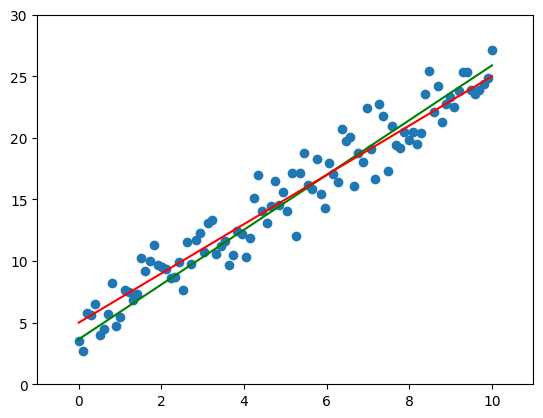

/tmp/ipykernel_556152/1355512811.py:59: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_show[i] = y


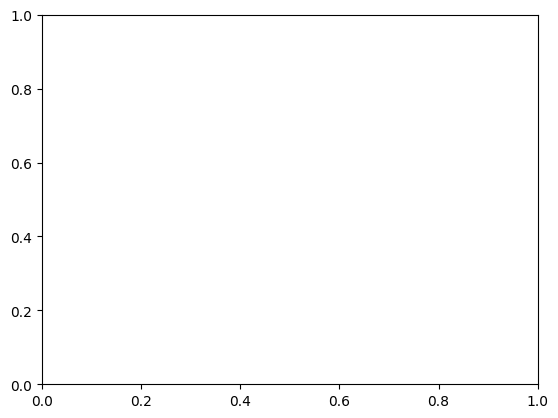

In [7]:
W1 = np.random.randn(1,3)
B1 = np.random.randn(1,3)
W2 = np.random.randn(3,3)
B2 = np.random.randn(1,3)
W3 = np.random.randn(3,1)
B3 = np.random.randn(1,1)
x_data = data_shuffle[:,0]
y_data = data_shuffle[:,1]
fig = plt.figure()
ax = fig.add_subplot()
ax.set_xlim(-1, 11)
ax.set_ylim(0, 25)
display(fig, display_id='plot')
inputs = np.empty((0,1))
targets = np.empty((0,1))
for epoch in range(epochs):
    batch_count = 0
    inputs = np.empty((0,1))
    targets = np.empty((0,1))
    for i in range(x_data.shape[0]):
        batch_count = batch_count + 1
        if batch_count < batch_size:
            inputs = np.concatenate([inputs, x_data[i].reshape(1,-1)], axis=0)
            targets = np.concatenate([targets, y_data[i].reshape(1,-1)], axis=0)
            continue
        else:
            inputs = np.concatenate([inputs, x_data[i].reshape(1,-1)], axis=0)
            targets = np.concatenate([targets, y_data[i].reshape(1,-1)], axis=0)
            batch_count = 0
        x1 =inputs * W1 + B1
        x2 = np.matmul(x1, W2) + B2
        y = np.matmul(x2, W3) + B3

        delta_y = (targets - y) * (-1) # [batch_size]
        grad_b3 = np.sum(delta_y) / batch_size
        grad_w3 = np.sum((delta_y * x2).T, axis=-1) / batch_size
        grad_b2 = np.sum(delta_y) * W3.T / batch_size
        grad_w2 = np.sum(delta_y.reshape(batch_size,1,1) * np.matmul(x1.reshape(batch_size,-1,1), W3.T), axis=0) / batch_size
        grad_b1 = np.sum(delta_y) * np.matmul(W2, W3).T / batch_size
        grad_w1 = np.sum(delta_y * inputs * np.matmul(W2, W3).T, axis=0) / batch_size
        # if batch_count >= batch_size:
        B3 = B3 - lr * grad_b3
        W3 = W3 - lr * grad_w3.reshape(-1,1)
        B2 = B2 - lr * grad_b2
        W2 = W2 - lr * grad_w2
        B1 = B1 - lr * grad_b1
        W1 = W1 - lr * grad_w1.reshape(1,-1)
        inputs = np.empty((0,1))
        targets = np.empty((0,1))
        
    ax.set_xlim(-1, 11)
    ax.set_ylim(0, 30)
    ax.scatter(data_scatter[:,0], data_scatter[:,1])
    y_show = copy.deepcopy(data_true[:,1])
    for i, x in enumerate(data_true[:,0]):
        x1 = x * W1 + B1
        x2 = np.matmul(x1, W2) + B2
        y = np.matmul(x2, W3) + B3
        y_show[i] = y
    ax.plot(data_true[:,0], y_show, color='green')
    ax.plot(data_true[:,0], data_true[:,1], color='red')
    display(fig, display_id='plot',update=True)
    ax.clear()

In [8]:
np.concatenate([np.empty((0,1)),np.array([[1]])])

array([[1.]])